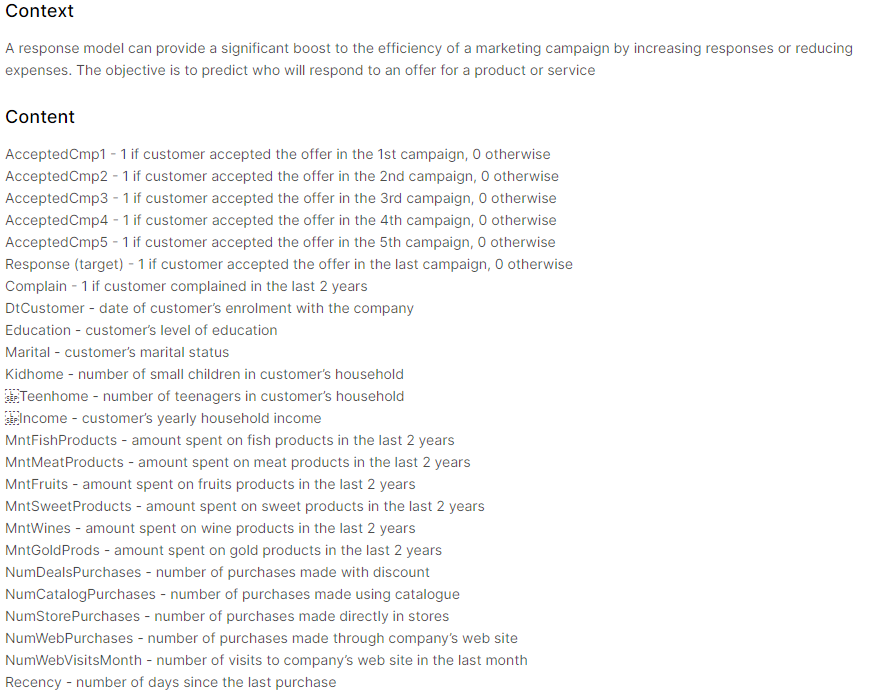
https://www.kaggle.com/rodsaldanha/arketing-campaign

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
df.tail().T

,2235,2236,2237,2238,2239
ID,10870,4001,7270,8235,9405
Year_Birth,1967,1946,1981,1956,1954
Education,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Married,Together,Divorced,Together,Married
Income,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,2,0,0,1
Teenhome,1,1,0,1,1
Dt_Customer,2013-06-13,2014-06-10,2014-01-25,2014-01-24,2012-10-15
Recency,46,56,91,8,40
MntWines,709,406,908,428,84


### Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Fill null values
null_index = df[df['Income'].isnull()].index

In [6]:
df['Income'] = df[['Income', 'Education']].groupby(['Education'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [7]:
df.iloc[null_index]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,52720.373656,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,52720.373656,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,56145.313929,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,52720.373656,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,52720.373656,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,47633.190000,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,56145.313929,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,52720.373656,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,52917.534247,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,56145.313929,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52253.592375,25039.085601,1730.0,35538.75,51609.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


### Feature Engineering

#### 1. Categorical features: Education (1 Basic to 5 Phd)

In [9]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Represent education level on a scale of 1-5 depending on level of qualification

In [10]:
df['Education'].replace(['Basic','Graduation','2n Cycle','Master','PhD'], [1,2,3,4,5],inplace=True)

#### 2. Categorical features: Marital Status (0 for Married; 1 for Single)

In [11]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
df['Marital_1'] = df['Marital_Status']=='Married'

In [13]:
df['Marital_1'] = df['Marital_1'].astype(int)

In [14]:
df['Marital_1'].value_counts()

0    1376
1     864
Name: Marital_1, dtype: int64

#### 3. Datetime: length of membership (relative to first member)

In [15]:
#Convert string to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')

In [16]:
df['days_membership'] = df['Dt_Customer']-df['Dt_Customer'].min()
df['days_membership'] = df['days_membership'].dt.days
df['days_membership']

0        36
1       586
2       387
3       560
4       538
       ... 
2235    318
2236    680
2237    544
2238    543
2239     77
Name: days_membership, Length: 2240, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int64         
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [18]:
# Predictors
X = df.drop(labels=['Z_CostContact', 'Z_Revenue', 'Response', 'Dt_Customer', 'ID', 'Marital_Status'], axis=1)

In [19]:
# Target
y = df['Response']

### Lasso Regression for Feature Selection (TRY)

In [20]:
# Check incidence of target: 14% - due to low incidence of target, we will perform stratification
sum(y)/len(y)

0.14910714285714285

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [22]:
#Scale features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [23]:
# Create Model
lr = LinearRegression()
# Fit
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
las = Lasso()

# keep track of the intermediate results for coefficients and errors
las_coefs = []
las_errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in lasso_alphas:
    las.set_params(alpha=a)
    las.fit(X_scaled,y)
    las_coefs.append(las.coef_)
    las_errors.append(mean_squared_error(las.coef_,lr.coef_))

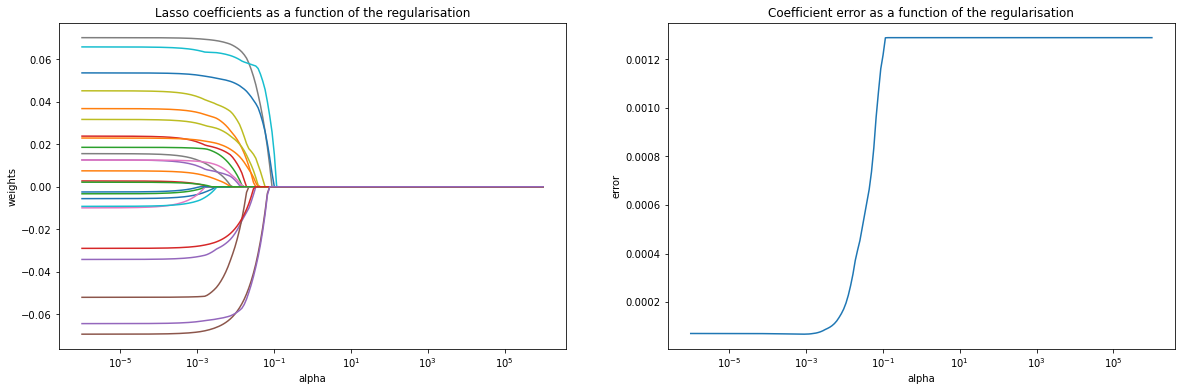

In [25]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, las_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, las_errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [26]:
# Find Optimal Lasso Using LassoCV
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X_train, y_train)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X_test, y_test))

Alpha: 0.0020729217795953697
Score: 0.3316358467054319


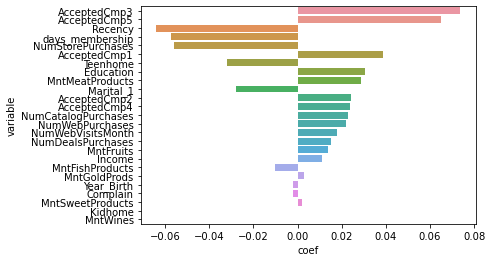

In [27]:
# Plot Coefficient
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="coef", y="variable", data=model_coefs)
view_coeff(X, optimal_lasso)

In [28]:
model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': optimal_lasso.coef_,
                                'abs_coef': np.abs(optimal_lasso.coef_)})
drop_var = model_coefs[model_coefs['coef'] == 0]['variable'].to_list()
drop_var

['MntWines']

In [29]:
from sklearn.metrics import roc_auc_score

def auc(variables, target, basetable):
    X = basetable[variables]
    y = basetable[target]
    logreg = LogisticRegression()
    logreg.fit(X,y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictions)
    return auc

In [30]:
# concatenate scaled-features
basetable = pd.DataFrame(X_scaled, columns = X.columns)
basetable['Response'] = y

In [31]:
# check auc score of model based on lasso regression selection
variables = X.drop(labels=drop_var, axis=1).columns.to_list()
target = 'Response'
auc(variables, target, basetable)

0.8999346532538282

### Forward Feature Selection

In [32]:
# Calculating the next best variable
def next_best(current_variables, candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable

In [33]:
# The forward stepwise variable selectin procedure
candidate_variables = X.columns.to_list()
current_variables = []
target = 'Response'
max_number_variables = len(candidate_variables)
number_iterations = min(max_number_variables, len(candidate_variables))
for i in range (0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables, target, basetable)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
print(current_variables)
del next_variable

['NumCatalogPurchases', 'Recency', 'days_membership', 'AcceptedCmp5', 'AcceptedCmp3', 'AcceptedCmp1', 'Marital_1', 'Education', 'Teenhome', 'NumWebVisitsMonth', 'MntMeatProducts', 'NumStorePurchases', 'AcceptedCmp4', 'NumDealsPurchases', 'AcceptedCmp2', 'NumWebPurchases', 'Year_Birth', 'MntWines', 'Kidhome', 'MntSweetProducts', 'MntFishProducts', 'Complain', 'Income', 'MntFruits', 'MntGoldProds']


In [34]:
auc_values = []
variables_evaluate = []
for v in current_variables:
    variables_evaluate.append(v)
    auc_value = auc(variables_evaluate, target, basetable)
    auc_values.append(auc_value)

In [35]:
X = basetable.drop(labels=[target], axis=1)
y = basetable[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0, stratify = y)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [36]:
auc_values_train = []
variables_evaluate = []
for v in current_variables:
    variables_evaluate.append(v)
    auc_value_train = auc(variables_evaluate, target, train)
    auc_values_train.append(auc_value_train)

In [37]:
auc_values_test = []
variables_evaluate = []
for v in current_variables:
    variables_evaluate.append(v)
    auc_value_test = auc(variables_evaluate, target, test)
    auc_values_test.append(auc_value_test)

Text(0, 0.5, 'AUC')

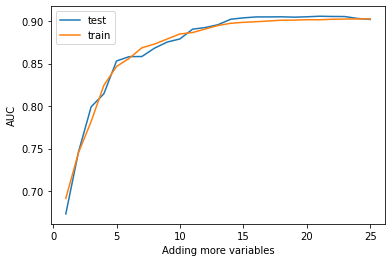

In [38]:
plt.plot(np.arange(1,len(current_variables)+1,1),auc_values_test, label='test')
plt.plot(np.arange(1,len(current_variables)+1,1),auc_values_train, label='train')
plt.legend()
plt.xlabel('Adding more variables')
plt.ylabel('AUC')

In [39]:
# The forward stepwise variable selectin procedure
candidate_variables = X.columns.to_list()
current_variables = []
target = 'Response'
max_number_variables = 15
number_iterations = min(max_number_variables, len(candidate_variables))
for i in range (0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables, target, basetable)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
print(current_variables)
del next_variable

['NumCatalogPurchases', 'Recency', 'days_membership', 'AcceptedCmp5', 'AcceptedCmp3', 'AcceptedCmp1', 'Marital_1', 'Education', 'Teenhome', 'NumWebVisitsMonth', 'MntMeatProducts', 'NumStorePurchases', 'AcceptedCmp4', 'NumDealsPurchases', 'AcceptedCmp2']


### Logistics Regression

In [40]:
# Reset features
X = df[current_variables]
X.columns

Index(['NumCatalogPurchases', 'Recency', 'days_membership', 'AcceptedCmp5',
       'AcceptedCmp3', 'AcceptedCmp1', 'Marital_1', 'Education', 'Teenhome',
       'NumWebVisitsMonth', 'MntMeatProducts', 'NumStorePurchases',
       'AcceptedCmp4', 'NumDealsPurchases', 'AcceptedCmp2'],
      dtype='object')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [42]:
#Scale features
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [43]:
X_test

array([[-0.91324771,  1.50779467, -0.19691083, ..., -0.28264785,
        -0.16777871, -0.10776318],
       [-0.57303094, -1.19270937, -1.13279073, ..., -0.28264785,
        -0.16777871, -0.10776318],
       [-0.57303094, -0.88111275,  0.96179761, ..., -0.28264785,
        -0.68769376, -0.10776318],
       ...,
       [ 0.78783617, -0.22329766,  1.57581405, ...,  3.53797136,
        -0.68769376, -0.10776318],
       [-0.91324771,  0.08829896,  1.51144136, ..., -0.28264785,
        -0.16777871, -0.10776318],
       [ 0.10740262,  1.43855098,  0.99150808, ...,  3.53797136,
        -0.68769376, -0.10776318]])

In [44]:
# Build Model
logreg = LogisticRegressionCV(cv=5, random_state=0)
# Fit Model
logreg.fit(X_train,y_train)
# Score
logreg.score(X_train,y_train)

0.889030612244898

In [45]:
coef = logreg.coef_
for p,c in zip(X.columns,list(coef[0])):
    print(p + '\t' + str(c))

NumCatalogPurchases	0.38368402522382505
Recency	-0.8025302504493468
days_membership	-0.7102227912826682
AcceptedCmp5	0.47778005211956875
AcceptedCmp3	0.5370135964307451
AcceptedCmp1	0.30147918830735465
Marital_1	-0.41654954663216515
Education	0.40613021648549824
Teenhome	-0.43279216790915287
NumWebVisitsMonth	0.279683940692767
MntMeatProducts	0.32024745031219404
NumStorePurchases	-0.46120358441944803
AcceptedCmp4	0.23795238366010799
NumDealsPurchases	0.21231573091316933
AcceptedCmp2	0.18139291404895289


In [46]:
logreg.intercept_

array([-2.61183386])

#### Evaluation of results

In [47]:
metrics.accuracy_score(y_train, logreg.predict(X_train))

0.889030612244898

In [48]:
y_pred_class = logreg.predict(X_test) #series of 1 and 0 as results
print(metrics.confusion_matrix(y_test, y_pred_class))

[[554  18]
 [ 49  51]]


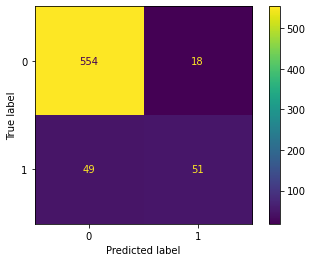

In [49]:
#Note that 0.5 threshold used here
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

Best Threshold=0.155034, G-Mean=0.822


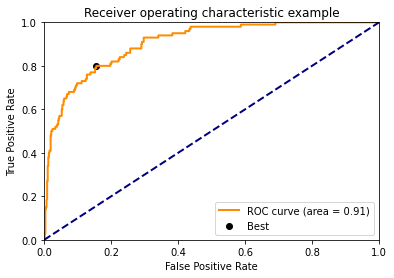

In [50]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
# [:,1] returns prob of getting 1 (i.e. joined campaign)
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
# The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class.
#calculate g-mean for each threshold
gmeans = np.sqrt(tpr*(1-fpr))
#local the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2 #linewidth
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, preds)

0.9052447552447552

In [54]:
best_threshold = thresholds[ix]
y_pred_best = (logreg.predict_proba(X_test)[:,1]>best_threshold).astype('float') #series of 1 and 0 as results

best_matrix=metrics.confusion_matrix(y_test, y_pred_best)
best_matrix

array([[483,  89],
       [ 21,  79]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix at Threshold = 15%')

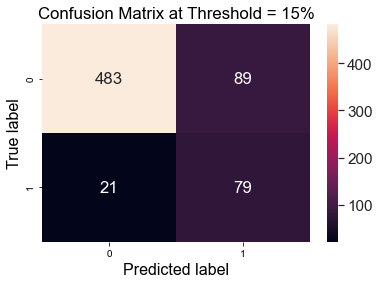

In [55]:
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(best_matrix, annot=True, fmt='g')
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.title('Confusion Matrix at Threshold = 15%')

In [56]:
#tpr
79/(21+79)

0.79

### Application of results

#### 1. Marketing campaign strategy and direction based on customer features

<AxesSubplot:xlabel='coef', ylabel='variable'>

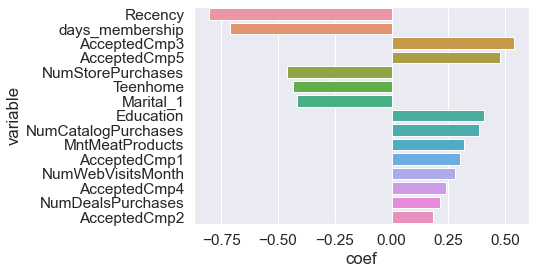

In [57]:
# Plot Coefficient
# Plot Coefficient
#def view_coeff(X, model):
logreg_coefs = pd.DataFrame({'variable': X.columns,
                            'coef': logreg.coef_[0],
                            'abs_coef': np.abs(logreg.coef_[0])})
logreg_coefs.sort_values('abs_coef', inplace=True, ascending=False)
sns.barplot(x="coef", y="variable", data=logreg_coefs)

In [73]:
logreg_coefs['variable labels'] = logreg_coefs['variable'].replace(\
    {'NumCatalogPurchases':'Catalogue purchases',\
    'Recency':'Days since last purchase',\
     'days_membership':'Recency of membership',\
     'AcceptedCmp1':'Response on 1st campaign',\
     'AcceptedCmp2':'Response on 2nd campaign',\
     'AcceptedCmp3':'Response on 3rd campaign',\
     'AcceptedCmp4':'Response on 4th campaign',\
     'AcceptedCmp5':'Response on 5th campaign',\
     'Marital_1':'Marital status',\
     'Education':'Education level',\
     'Teenhome':'Teenagers at home',\
     'NumWebVisitsMonth':'Web Visits',\
     'MntMeatProducts':'Spend on meat',\
     'NumStorePurchases':'In-store purchases',\
     'NumDealsPurchases':'Discounted purchases'})

logreg_coefs

,variable,coef,abs_coef,variable labels
1,Recency,-0.802530,0.802530,Days since last purchase
2,days_membership,-0.710223,0.710223,Recency of membership
4,AcceptedCmp3,0.537014,0.537014,Response on 3rd campaign
3,AcceptedCmp5,0.477780,0.477780,Response on 5th campaign
11,NumStorePurchases,-0.461204,0.461204,In-store purchases
8,Teenhome,-0.432792,0.432792,Teenagers at home
6,Marital_1,-0.416550,0.416550,Marital status
7,Education,0.406130,0.406130,Education level
0,NumCatalogPurchases,0.383684,0.383684,Catalogue purchases
10,MntMeatProducts,0.320247,0.320247,Spend on meat


<AxesSubplot:xlabel='coef', ylabel='variable labels'>

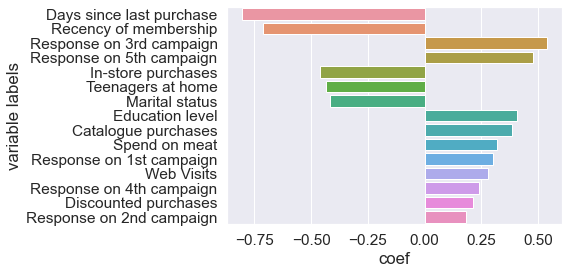

In [74]:
sns.barplot(x="coef", y="variable labels", data=logreg_coefs)

#### 2. Profitability

Assume cost = 3 per engagement and revenue = 11 per response

In [58]:
#Base model 
len(df[df['Response']==1])/len(df)

0.14910714285714285

In [59]:
#Best threshold
thresholds[ix]

0.15503430213445873

In [60]:
#List customers that has 50% or more probability to response
#Probability given new campaign for all customers

X_scaled = sc.transform (X)
preds_new = logreg.predict_proba(X_scaled)[:,1]
df_pred = df
df_pred['response_prob'] = preds_new
df_pred[df_pred['response_prob']>=0.5]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_1,days_membership,response_prob
0,5524,1957,2,Single,58138.00,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,0,36,0.551621
15,2114,1946,5,Single,82800.00,0,0,2012-11-24,23,1006,...,1,1,0,0,3,11,1,0,117,0.883102
21,5376,1979,2,Married,2447.00,1,0,2013-01-06,42,1,...,0,0,0,0,3,11,0,1,160,0.989914
39,2968,1943,5,Divorced,48948.00,0,0,2013-02-01,53,437,...,0,0,0,0,3,11,1,0,186,0.877157
55,6260,1955,4,Together,82384.00,0,0,2012-11-19,55,984,...,1,0,0,0,3,11,1,0,112,0.553641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,3968,1970,3,Divorced,65706.00,0,0,2013-06-28,77,918,...,1,0,1,0,3,11,1,0,333,0.648033
2175,1772,1975,5,Married,79174.00,0,0,2013-01-11,2,1074,...,1,1,0,0,3,11,1,1,165,0.939547
2193,8722,1957,3,Married,82347.00,0,0,2012-11-06,38,556,...,0,1,0,0,3,11,1,1,99,0.856122
2221,7366,1982,4,Single,75777.00,0,0,2013-07-04,12,712,...,1,0,0,0,3,11,1,0,339,0.807132


In [61]:
preds_new

array([0.55162081, 0.01840237, 0.03946926, ..., 0.01022295, 0.05228471,
       0.11789893])

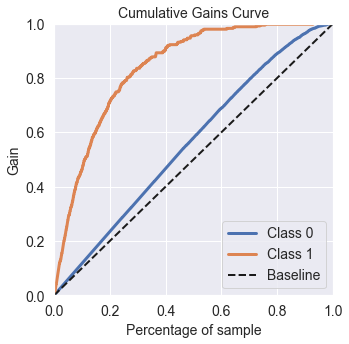

In [62]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y,logreg.predict_proba(X_scaled), figsize=(5,5), title_fontsize='small',text_fontsize='small')
plt.show()

In [63]:
population_size = len(df)
target_incidence = sum(y)/len(y)
reward_target = 11
cost_campaign = 3
print('population_size:', population_size)
print('target_incidence:', target_incidence)

population_size: 2240
target_incidence: 0.14910714285714285


In [64]:
# Base model profit
sum(y)*reward_target - len(y)*cost_campaign

-3046

In [65]:
# Profit function
def profit(perc_targets, perc_selected, target_incidence, population_size, reward_target, cost_campaign):
    cost = cost_campaign * perc_selected * population_size
    reward = reward_target * perc_targets * target_incidence * population_size
    return (reward - cost)

In [66]:
perc_targets = np.array([0, 0.7, 0.9, 1, 1, 1])
perc_selected = np.linspace(0, 1, 6)

Text(0, 0.5, 'Profit/(Loss)')

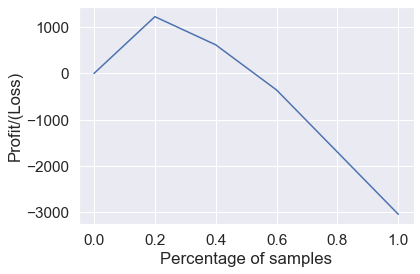

In [68]:
profits = []

for i in range(6):
    p = profit(perc_targets[i], perc_selected[i], target_incidence, population_size, reward_target, cost_campaign)
    profits.append(p)
plt.plot(perc_selected, profits)
plt.xlabel('Percentage of samples')
plt.ylabel('Profit/(Loss)')

In [75]:
sum(y) #positive response count

334

In [76]:
0.7*334*11 - 0.2*2240*3

1227.7999999999997